In [1]:
import numpy as np
import pandas as pd
import csv
import random
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
subject=[]
BETA=[]
PHI=[]
PERSEV=[]

In [2]:
def read_data(n):
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    comparision = [] #r-r_b; 1:>=0, 0:<0
    num = str(100+n)
    file = pd.read_csv('E:/multi-bandit/task3/data/' + num + '.csv')
    name = 'sub (' +str(n) +').csv'
    action_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    for i in range((file.shape[0])):

        if file.iloc[i,4] == 0 and file.iloc[i,action_index]!='None' :
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            if int(file.iloc[i,reward_index]) >= int(file.iloc[i,reward_index+1]):
                comparision.append(int(file.iloc[i,reward_index])-int(file.iloc[i,reward_index+1]))
            else:
                comparision.append(int(file.iloc[i,reward_index+1])-int(file.iloc[i,reward_index]))
        elif file.iloc[i,4] == 0 and file.iloc[i,action_index] =='None' :
            action.append(4)
            reward.append(0)
            reward_B.append(0)
            comparision.append(0)
    return action,reward,reward_B,comparision

In [6]:
delete_subject = [10,16,18,25,39,45]

In [3]:
def rewards2comparison(action,reward,reward_B):
    for i in range(len(action)):
        if action[i]!=4:
            pass
    pass
def read_parameter(file_name):
    parameter_result = pd.read_csv(file_name)
    beta = []
    phi = []
    persev = []
    gamma = []
    for i in range(10):
        beta.append(parameter_result.iloc[i,1])
    for i in range(10):
        phi.append(parameter_result.iloc[i+10,1])
    for i in range(10):
        persev.append(parameter_result.iloc[i+20,1])
    for i in range(10):
        gamma.append(parameter_result.iloc[i+30,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    return beta,phi,persev,gamma
    
def action_probability(Q,action,beta):
    return np.log(np.exp(Q[action]*beta)/(np.exp(Q[0]*beta)+np.exp(Q[1]*beta)+np.exp(Q[2]*beta)+np.exp(Q[3]*beta)))

def likelyhood(file_name):
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 10
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s+1) 
        comparision = rewards2comparison(action,reward,reward_B)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=0:
                        pb[action[t-1]] = persev[s]
                loglikelyhood += action_probability((v+eb+pb+re),action[t],beta[s])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
            
def likelyhood_ru_c(file_name):
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 10
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s+1) 
        comparision = rewards2comparison(action,reward,reward_B)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig - min_sig
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * np.ones((4))
                if t>0:
                    if action[t-1]!=0:
                        pb[action[t-1]] = persev[s]
                loglikelyhood += action_probability((v+eb+pb+re),action[t],beta[s])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
            
            


In [5]:
simulation_zero = pd.read_csv('./simulation_comparision_zero_bayesian_learning_pystan.csv')
simulation_plus = pd.read_csv('./simulation_comparision_plus_bayesian_learning_pystan.csv')
simulation_neg = pd.read_csv('./simulation_comparision_neg_bayesian_learning_pystan.csv')

In [4]:
def read_parameter_task3(file_name):
    parameter_result = pd.read_csv(file_name)
    subject_pair_num = 24
    beta_0 = []
    phi_0 = []
    persev_0 = []
    beta_1 = []
    phi_1 = []
    persev_1 = []
    beta = []
    phi = []
    persev = []
    for i in range(subject_pair_num):
        beta_0.append(parameter_result.iloc[i*2,1])
    for i in range(subject_pair_num):
        phi_0.append(parameter_result.iloc[i*2+subject_pair_num*2,1])
    for i in range(subject_pair_num):
        persev_0.append(parameter_result.iloc[i*2+subject_pair_num*2*2,1])
    for i in range(subject_pair_num):
        beta_1.append(parameter_result.iloc[i*2+1,1])
    for i in range(subject_pair_num):
        phi_1.append(parameter_result.iloc[i*2+1+subject_pair_num*2,1])
    for i in range(subject_pair_num):
        persev_1.append(parameter_result.iloc[i*2+1+subject_pair_num*2*2,1])
        
    for i in range(subject_pair_num):
        beta.append((beta_0[i]+beta_1[i])/2)
    for i in range(subject_pair_num):
        phi.append((phi_0[i]+phi_1[i])/2)
    for i in range(subject_pair_num):
        persev.append((persev_0[i]+persev_1[i])/2)

    beta_0 = np.array(beta_0)
    phi_0 = np.array(phi_0)
    persev_0 = np.array(persev_0)
    
    beta_1 = np.array(beta_1)
    phi_1 = np.array(phi_1)
    persev_1 = np.array(persev_1)

    return beta_0,phi_0,persev_0,beta_1,phi_1,persev_1,beta,phi,persev

In [5]:
beta_0,phi_0,persev_0,beta_1,phi_1,persev_1,beta,phi,persev = read_parameter_task3('./nhb_ru_no_gamma_task3_24.csv')

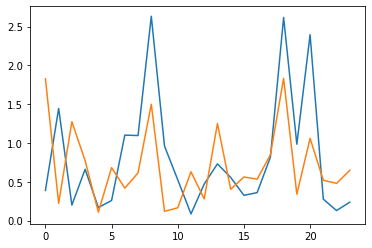

In [9]:
plt.plot(persev_0)
plt.plot(persev_1)

In [13]:
print(persev_0)
print(persev_1)

[0.38912151 1.44495654 0.20024051 0.66181198 0.16940815]
[1.82833906 0.22268642 1.27484597 0.77279485 0.10938312]


In [6]:
data = {'beta_0':beta_0,'phi_0':phi_0,'persev_0':persev_0,
        'beta_1':beta_1,'phi_1':phi_1,'persev_1':persev_1,
        'beta':beta,'phi':phi,'persev':persev}
df = pd.DataFrame(data)

In [22]:
beta_di = beta_1 - beta_0
distribution = np.zeros((np.shape(beta_di)))

In [23]:
print(beta_di)

[-0.12100415 -0.06945153 -0.09052425  0.07516355 -0.23045883  0.02625749
 -0.01038272 -0.06822835 -0.1089093  -0.06086238  0.00072741 -0.00664879
 -0.11730754 -0.01215354 -0.03750025 -0.06755382 -0.01118271 -0.15061242
  0.02763409  0.01707328  0.00717402  0.08515659 -0.02406372 -0.03102682]


In [10]:
def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p

In [11]:
print(stats.ttest_ind(beta_0,beta_1))

Ttest_indResult(statistic=2.4931819638512738, pvalue=0.01632066093679949)


In [12]:
print(stats.ttest_ind(phi_0,phi_1))

Ttest_indResult(statistic=2.9837280405608158, pvalue=0.0045462351274103635)


In [13]:
print(stats.ttest_ind(persev_0,persev_1))

Ttest_indResult(statistic=0.5228079043738024, pvalue=0.6036171235375526)


In [7]:
t_statistic, p_value = stats.ttest_1samp(beta_0-beta_1, 0)
print(p_value,t_statistic)

0.011048289825564644 2.7638702902390695


In [8]:
t_statistic, p_value = stats.ttest_1samp(phi_0-phi_1, 0)
print(p_value,t_statistic)

0.004179667676332997 3.179357165596503


In [9]:
t_statistic, p_value = stats.ttest_1samp(persev_0-persev_1, 0)
print(p_value,t_statistic)

0.5049505205863553 0.6773343221279832


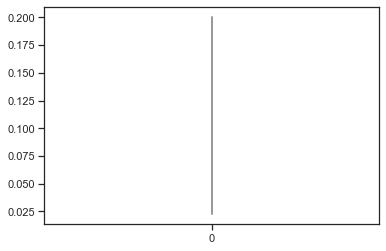

In [37]:
ax_1 = sns.boxplot(data=df["beta_1"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_1 = ax_1.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_1 = whisker_lines_1[1].get_ydata()[0]  # 上须的x坐标
ymin_1 = whisker_lines_1[0].get_ydata()[0]  # 下须的x坐标
ymean_1 = whisker_lines_1[2].get_ydata()[0]  # 下须的x坐标

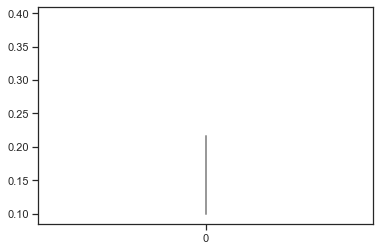

In [38]:
ax_0 = sns.boxplot(data=df["beta_0"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_0 = ax_0.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_0 = whisker_lines_0[1].get_ydata()[0]  # 上须的x坐标
ymin_0 = whisker_lines_0[0].get_ydata()[0]  # 下须的x坐标
ymean_0 = whisker_lines_0[2].get_ydata()[0]  # 下须的x坐标

0.20060346 0.022174028 0.12590296150000002
0.216694398 0.09870165 0.1492051155


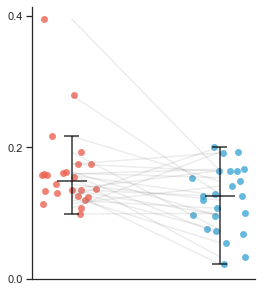

In [42]:
x_x_1 = 2.5
x_x_0 = 0.5
plt.figure(figsize=(4,5))
for i in range(len(persev_1)):
    plt.plot([x_x_1,x_x_0],[beta_1[i],beta_0[i]],c='grey',alpha=0.15)


COLOR = 'black'
ALPHA = 0.6
x_len = 0.1
x_x_1 = 2.5
x_1 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_1
plt.scatter(x_1,beta_1,s=40,color=(63/255,167/255,214/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_1, xmin=x_x_1-2*x_len, xmax=x_x_1+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_1, ymin=ymin_1, ymax=ymax_1, color=COLOR, linewidth=2,alpha=ALPHA)

x_x_0 = 0.5
x_0 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_0
plt.scatter(x_0,beta_0,s=40,color=(238/255,99/255,82/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_0, xmin=x_x_0-2*x_len, xmax=x_x_0+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_0, ymin=ymin_0, ymax=ymax_0, color=COLOR, linewidth=2,alpha=ALPHA)
# plt.scatter(x_x,(ymax+ymin)/2,s=60,color=COLOR,linewidths=0.5,alpha=ALPHA)
plt.yticks([0,0.2,0.4])
plt.xticks([])
sns.set(style='ticks')
sns.despine()
print(ymax_1,ymin_1,ymean_1)
print(ymax_0,ymin_0,ymean_0)

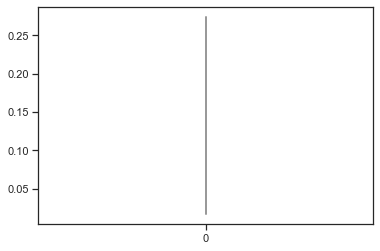

In [34]:
ax_1 = sns.boxplot(data=df["phi_1"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_1 = ax_1.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_1 = whisker_lines_1[1].get_ydata()[0]  # 上须的x坐标
ymin_1 = whisker_lines_1[0].get_ydata()[0]  # 下须的x坐标
ymean_1 = whisker_lines_1[2].get_ydata()[0]  # 下须的x坐标

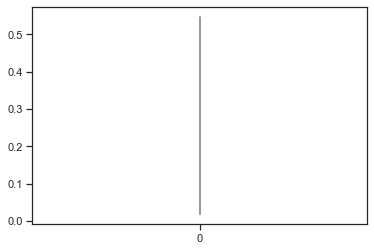

In [35]:
ax_0 = sns.boxplot(data=df["phi_0"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_0 = ax_0.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_0 = whisker_lines_0[1].get_ydata()[0]  # 上须的x坐标
ymin_0 = whisker_lines_0[0].get_ydata()[0]  # 下须的x坐标
ymean_0 = whisker_lines_0[2].get_ydata()[0]  # 下须的x坐标

0.274038001 0.016550062 0.084136058
0.547136656 0.017722841 0.168180243


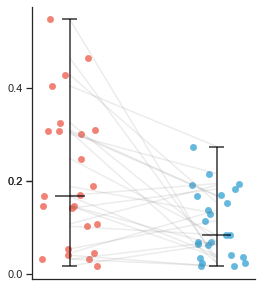

In [36]:
x_x_1 = 2.5
x_x_0 = 0.5
plt.figure(figsize=(4,5))
for i in range(len(persev_1)):
    plt.plot([x_x_1,x_x_0],[phi_1[i],phi_0[i]],c='grey',alpha=0.15)


COLOR = 'black'
ALPHA = 0.6
x_len = 0.1
x_x_1 = 2.5
x_1 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_1
plt.scatter(x_1,phi_1,s=40,color=(63/255,167/255,214/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_1, xmin=x_x_1-2*x_len, xmax=x_x_1+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_1, ymin=ymin_1, ymax=ymax_1, color=COLOR, linewidth=2,alpha=ALPHA)

x_x_0 = 0.5
x_0 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_0
plt.scatter(x_0,phi_0,s=40,color=(238/255,99/255,82/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_0, xmin=x_x_0-2*x_len, xmax=x_x_0+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_0, ymin=ymin_0, ymax=ymax_0, color=COLOR, linewidth=2,alpha=ALPHA)
# plt.scatter(x_x,(ymax+ymin)/2,s=60,color=COLOR,linewidths=0.5,alpha=ALPHA)
plt.yticks([0,0.2,0.2,0.4])
plt.xticks([])
sns.set(style='ticks')
sns.despine()
print(ymax_1,ymin_1,ymean_1)
print(ymax_0,ymin_0,ymean_0)

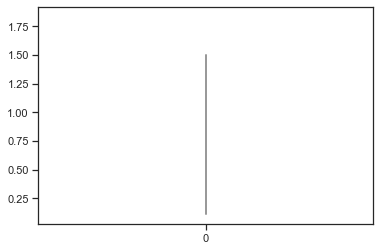

In [27]:
ax_1 = sns.boxplot(data=df["persev_1"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_1 = ax_1.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_1 = whisker_lines_1[1].get_ydata()[0]  # 上须的x坐标
ymin_1 = whisker_lines_1[0].get_ydata()[0]  # 下须的x坐标
ymean_1 = whisker_lines_1[2].get_ydata()[0]  # 下须的x坐标

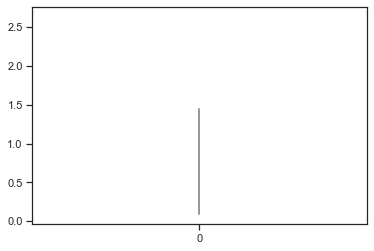

In [28]:
ax_0 = sns.boxplot(data=df["persev_0"],linewidth=2,fliersize=0,color='white',width=0.0)
whisker_lines_0 = ax_0.lines[2:5]  # 第5和第6条线是上下两个须的线
ymax_0 = whisker_lines_0[1].get_ydata()[0]  # 上须的x坐标
ymin_0 = whisker_lines_0[0].get_ydata()[0]  # 下须的x坐标
ymean_0 = whisker_lines_0[2].get_ydata()[0]  # 下须的x坐标

1.499536412 0.10938312 0.5894551180000001
1.444956537 0.086530223 0.5414202365


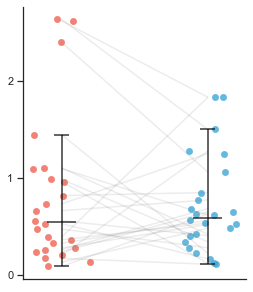

In [33]:
x_x_1 = 2.5
x_x_0 = 0.5
plt.figure(figsize=(4,5))
for i in range(len(persev_1)):
    plt.plot([x_x_1,x_x_0],[persev_1[i],persev_0[i]],c='grey',alpha=0.15)


COLOR = 'black'
ALPHA = 0.6
x_len = 0.1
x_x_1 = 2.5
x_1 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_1
plt.scatter(x_1,persev_1,s=40,color=(63/255,167/255,214/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_1, xmin=x_x_1-x_len, xmax=x_x_1+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_1, xmin=x_x_1-2*x_len, xmax=x_x_1+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_1, ymin=ymin_1, ymax=ymax_1, color=COLOR, linewidth=2,alpha=ALPHA)

x_x_0 = 0.5
x_0 = (np.random.random((len(persev_1)))-np.ones((len(persev_1)))*0.5)*0.8+np.ones((len(persev_1)))*x_x_0
plt.scatter(x_0,persev_0,s=40,color=(238/255,99/255,82/255),linewidths=0.5,alpha=0.8)
plt.hlines(y=ymax_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymin_0, xmin=x_x_0-x_len, xmax=x_x_0+x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.hlines(y=ymean_0, xmin=x_x_0-2*x_len, xmax=x_x_0+2*x_len, color=COLOR, linewidth=2,alpha=ALPHA)
plt.vlines(x=x_x_0, ymin=ymin_0, ymax=ymax_0, color=COLOR, linewidth=2,alpha=ALPHA)
# plt.scatter(x_x,(ymax+ymin)/2,s=60,color=COLOR,linewidths=0.5,alpha=ALPHA)
plt.yticks([0,1,2])
plt.xticks([])
sns.set(style='ticks')
sns.despine()
print(ymax_1,ymin_1,ymean_1)
print(ymax_0,ymin_0,ymean_0)

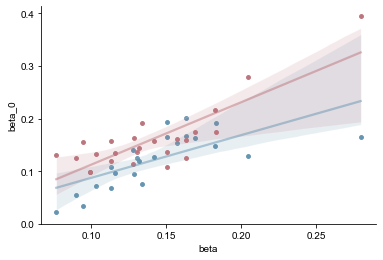

In [14]:
sns.regplot(x='beta',y='beta_1' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='beta',y='beta_0' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})##60 red
# plt.plot(beta,beta,c='grey',linestyle='dashdot')
plt.yticks([0,0.10,0.20,0.30,0.40])
plt.xticks([0.10,0.15,0.20,0.25])
sns.set(style='ticks')
sns.despine()

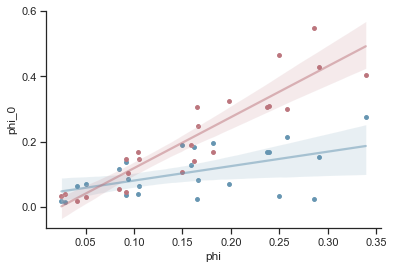

In [8]:
sns.regplot(x='phi',y='phi_1' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='phi',y='phi_0' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(phi,phi,c='grey',linestyle='dashdot')
plt.yticks([0,0.2,0.4,0.6])
sns.set(style='ticks')
sns.despine()

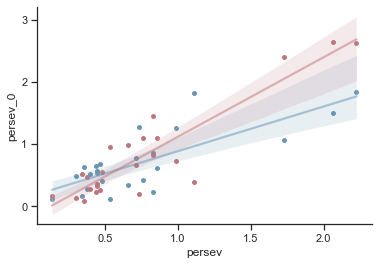

In [9]:
sns.regplot(x='persev',y='persev_1' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='persev',y='persev_0' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(persev,persev,c='grey',linestyle='dashdot')
plt.yticks([0,1.0,2.0,3.0])
sns.set(style='ticks')
sns.despine()

In [15]:
comparision_result = pd.read_csv('./formal_contrast_ru_c.csv')
comparision_0_result = pd.read_csv('./formal_contrast_ru_c_0.csv')

In [16]:
num_subject = 46

In [17]:
beta_1 = []
phi_1 = []
persev_1 = []
gamma_1 = []
beta_0 = []
phi_0 = []
persev_0 = []
gamma_0 = []
beta = []
phi = []
persev = []
gamma = []

for i in range(num_subject):
    beta_1.append(comparision_result.iloc[i,1])
for i in range(num_subject):
    phi_1.append(comparision_result.iloc[i+num_subject,1])
for i in range(num_subject):
    persev_1.append(comparision_result.iloc[i+num_subject*2,1])
for i in range(num_subject):
    gamma_1.append(comparision_result.iloc[i+num_subject*3,1])
for i in range(num_subject):
    beta_0.append(comparision_result.iloc[i+num_subject*4,1])
for i in range(num_subject):
    phi_0.append(comparision_result.iloc[i+num_subject*5,1])
for i in range(num_subject):
    persev_0.append(comparision_result.iloc[i+num_subject*6,1])
for i in range(num_subject):
    gamma_0.append(comparision_result.iloc[i+num_subject*7,1])
    
for i in range(num_subject):
    beta.append(comparision_0_result.iloc[i,1])
for i in range(num_subject):
    phi.append(comparision_0_result.iloc[i+num_subject,1])
for i in range(num_subject):
    persev.append(comparision_0_result.iloc[i+num_subject*2,1])
for i in range(num_subject):
    gamma.append(comparision_0_result.iloc[i+num_subject*3,1])
    
beta_0 = np.array(beta_0)
phi_0 = np.array(phi_0)
persev_0 = np.array(persev_0)
gamma_0 = np.array(gamma_0)

beta_1 = np.array(beta_1)
phi_1 = np.array(phi_1)
persev_1 = np.array(persev_1)
gamma_1 = np.array(gamma_1)

beta = np.array(beta)
phi = np.array(phi)
persev = np.array(persev)
gamma = np.array(gamma)

# beta_0 = np.delete(beta_0,delete_subject)
# phi_0 = np.delete(phi_0,delete_subject)
# persev_0 = np.delete(persev_0,delete_subject)
# gamma_0 = np.delete(gamma_0,delete_subject)

# beta_1 = np.delete(beta_1,delete_subject)
# phi_1 = np.delete(phi_1,delete_subject)
# persev_1 = np.delete(persev_1,delete_subject)
# gamma_1 = np.delete(gamma_1,delete_subject)

# beta = np.delete(beta,delete_subject)
# phi = np.delete(phi,delete_subject)
# persev = np.delete(persev,delete_subject)
# gamma = np.delete(gamma,delete_subject)


In [244]:
print(np.mean(beta))
print(np.mean(phi))
print(np.mean(persev))
print(np.mean(gamma))

0.06248724289331984
0.47471531059059807
6.559331480620957
4.02536594298015


In [12]:
beta_plus = []
beta_neg = []
phi_plus = []
phi_neg = []
persev_plus = []
persev_neg = []
gamma_plus = []
gamma_neg = []
for i in range(10):
    beta_plus.append(beta_1[i]-beta[i])
    beta_neg.append(beta[i]-beta_0[i])
    phi_plus.append(phi_1[i]-phi[i])
    phi_neg.append(phi[i]-phi_0[i])
    persev_plus.append(persev_1[i]-persev[i])
    persev_neg.append(persev[i]-persev_0[i])
    gamma_plus.append(gamma_1[i]-gamma[i])
    gamma_neg.append(gamma[i]-gamma_0[i])
beta_plus = np.array(beta_plus)
beta_neg = np.array(beta_neg)
phi_plus = np.array(phi_plus)
phi_neg = np.array(phi_neg)
persev_plus = np.array(persev_plus)
persev_neg = np.array(persev_neg)
gamma_plus = np.array(gamma_plus)
gamma_neg = np.array(gamma_neg)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_plus,beta_plus)
par_0 = np.polyfit(reward_di_plus,beta_plus.squeeze(),1)
y_0 = par_0[0] * reward_di_plus  + par_0[1]
plt.plot(reward_di_plus,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_neg,beta_neg)
par_0 = np.polyfit(reward_di_neg,beta_neg.squeeze(),1)
y_0 = par_0[0] * reward_di_neg  + par_0[1]
plt.plot(reward_di_neg,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_plus,phi_plus)
par_0 = np.polyfit(reward_di_plus,phi_plus.squeeze(),1)
y_0 = par_0[0] * reward_di_plus  + par_0[1]
plt.plot(reward_di_plus,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_neg,phi_neg)
par_0 = np.polyfit(reward_di_neg,phi_neg.squeeze(),1)
y_0 = par_0[0] * reward_di_neg  + par_0[1]
plt.plot(reward_di_neg,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_plus,persev_plus)
par_0 = np.polyfit(reward_di_plus,persev_plus.squeeze(),1)
y_0 = par_0[0] * reward_di_plus  + par_0[1]
plt.plot(reward_di_plus,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_neg,persev_neg)
par_0 = np.polyfit(reward_di_neg,persev_neg.squeeze(),1)
y_0 = par_0[0] * reward_di_neg  + par_0[1]
plt.plot(reward_di_neg,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_plus,gamma_plus)
par_0 = np.polyfit(reward_di_plus,gamma_plus.squeeze(),1)
y_0 = par_0[0] * reward_di_plus  + par_0[1]
plt.plot(reward_di_plus,y_0)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reward_di_neg,gamma_neg)
par_0 = np.polyfit(reward_di_neg,gamma_neg.squeeze(),1)
y_0 = par_0[0] * reward_di_neg  + par_0[1]
plt.plot(reward_di_neg,y_0)

In [18]:
data = {'beta_0':beta_0,'phi_0':phi_0,'persev_0':persev_0,'gamma_0':gamma_0,
        'beta_1':beta_1,'phi_1':phi_1,'persev_1':persev_1,'gamma_1':gamma_1,
        'beta':beta,'phi':phi,'persev':persev,'gamma':gamma}
df = pd.DataFrame(data)


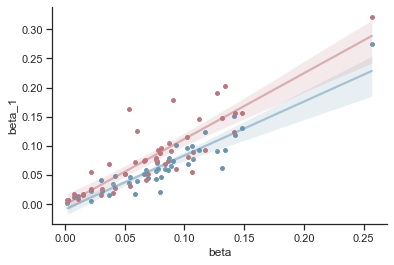

In [26]:
# sns.regplot(x='beta',y='beta_0' ,data=df,
#             line_kws={"color":"darkorange","alpha":0.5},
#             scatter_kws={"color":"darkorange","alpha":0.8,"s":15})
# sns.regplot(x='beta',y='beta_1' ,data=df,
#             line_kws={"color":"darkviolet","alpha":0.5},
#             scatter_kws={"color":"darkviolet","alpha":0.8,"s":15})
# plt.plot(beta,beta,c='grey',linestyle='dashdot',alpha=0.4)
# sns.set(style='ticks')
# sns.despine()
sns.regplot(x='beta',y='beta_0' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='beta',y='beta_1' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(beta,beta,c='grey',linestyle='dashdot')
sns.set(style='ticks')
sns.despine()

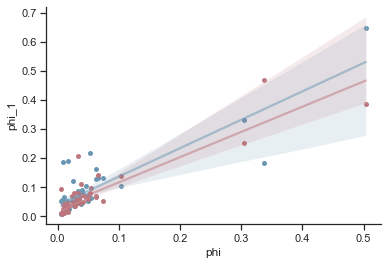

In [25]:
sns.set(style='ticks')
sns.despine()
sns.regplot(x='phi',y='phi_0' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='phi',y='phi_1' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(phi,phi,c='grey',linestyle='dotted')
sns.set(style='ticks')
sns.despine()

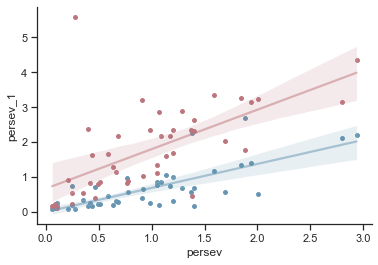

In [24]:
sns.set(style='ticks')
sns.despine()
sns.regplot(x='persev',y='persev_0' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='persev',y='persev_1' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(persev,persev,c='grey',linestyle='dotted')
sns.set(style='ticks')
sns.despine()

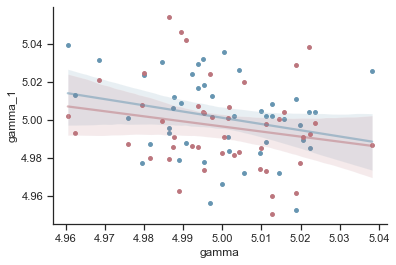

In [23]:
sns.set(style='ticks')
sns.despine()
sns.regplot(x='gamma',y='gamma_0' ,data=df,
            line_kws={"color":(102/255,149/255,177/255),"alpha":0.5},
            scatter_kws={"color":(102/255,149/255,177/255),"alpha":1,"s":15})
sns.regplot(x='gamma',y='gamma_1' ,data=df,
            line_kws={"color":(188/255,117/255,125/255),"alpha":0.5},
            scatter_kws={"color":(188/255,117/255,125/255),"alpha":1,"s":15})
# plt.plot(gamma,gamma,c='grey',linestyle='dotted')
sns.set(style='ticks')
sns.despine()

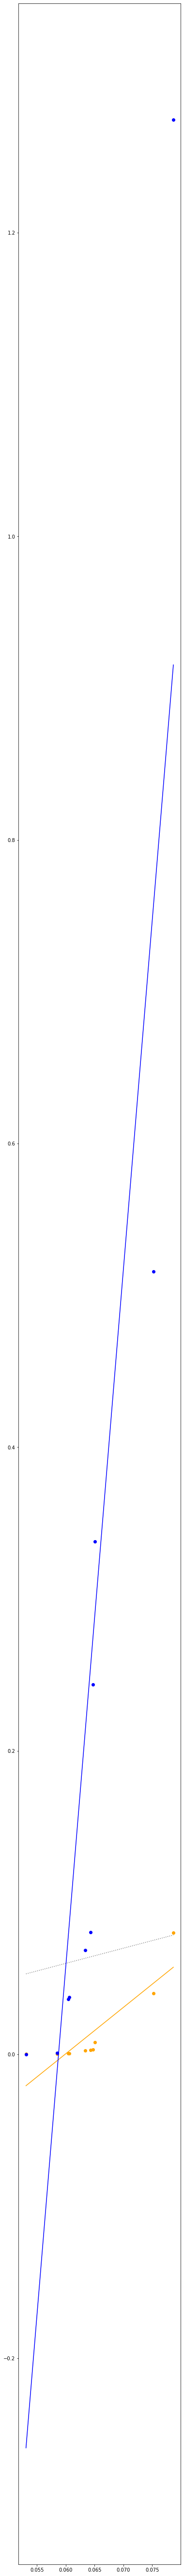

In [249]:
plt.figure(figsize=(6,6*max(np.max(beta_0),np.max(beta_1))/np.max(beta)))
plt.plot(beta,beta,c='grey',linestyle='dotted')
plt.scatter(beta,beta_0,c='orange')
plt.scatter(beta,beta_1,c='blue')
par_0 = np.polyfit(beta,beta_0.squeeze(),1)
par_1 = np.polyfit(beta,beta_1.squeeze(),1)
y_0 = par_0[0] * beta  + par_0[1]
y_1 = par_1[0] * beta  + par_1[1]
plt.plot(beta,y_0,c='orange')
plt.plot(beta,y_1,c='blue')

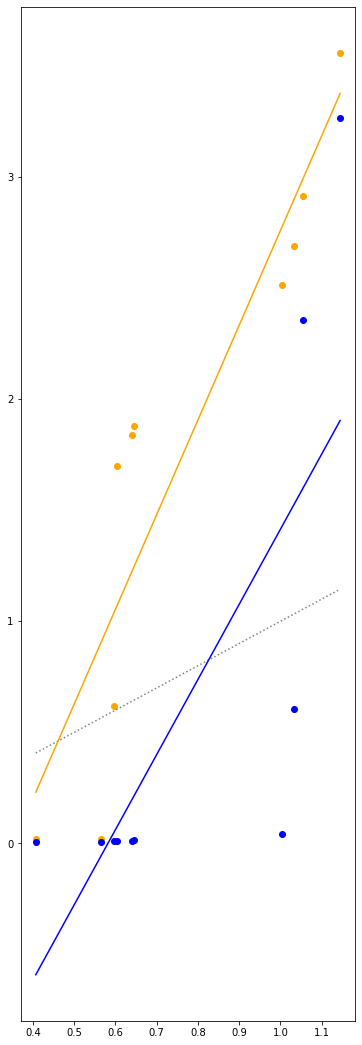

In [250]:
plt.figure(figsize=(6,6*max(np.max(phi_0),np.max(phi_1))/np.max(phi)))
plt.plot(phi,phi,c='grey',linestyle='dotted')
plt.scatter(phi,phi_0,c='orange')
plt.scatter(phi,phi_1,c='blue')
par_0 = np.polyfit(phi,phi_0.squeeze(),1)
par_1 = np.polyfit(phi,phi_1.squeeze(),1)
y_0 = par_0[0] * phi  + par_0[1]
y_1 = par_1[0] * phi  + par_1[1]
plt.plot(phi,y_0,c='orange')
plt.plot(phi,y_1,c='blue')

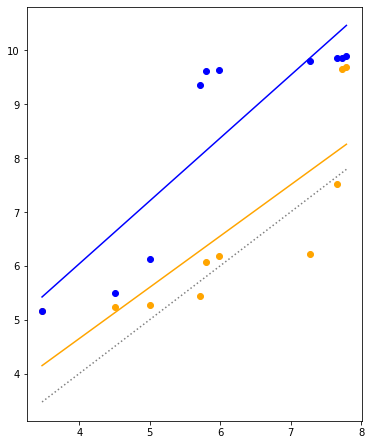

In [251]:
plt.figure(figsize=(6,6*max(np.max(persev_0),np.max(persev_1))/np.max(persev)))
plt.plot(persev,persev,c='grey',linestyle='dotted')
plt.scatter(persev,persev_0,c='orange')
plt.scatter(persev,persev_1,c='blue')
par_0 = np.polyfit(persev,persev_0.squeeze(),1)
par_1 = np.polyfit(persev,persev_1.squeeze(),1)
y_0 = par_0[0] * persev  + par_0[1]
y_1 = par_1[0] * persev  + par_1[1]
plt.plot(persev,y_0,c='orange')
plt.plot(persev,y_1,c='blue')

[]

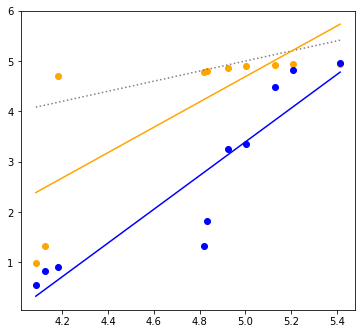

In [252]:
plt.figure(figsize=(6,6*max(np.max(gamma_0),np.max(gamma_1))/np.max(gamma)))
plt.plot(gamma,gamma,c='grey',linestyle='dotted')
plt.scatter(gamma,gamma_0,c='orange')
plt.scatter(gamma,gamma_1,c='blue')
par_0 = np.polyfit(gamma,gamma_0.squeeze(),1)
par_1 = np.polyfit(gamma,gamma_1.squeeze(),1)
y_0 = par_0[0] * gamma  + par_0[1]
y_1 = par_1[0] * gamma  + par_1[1]
plt.plot(gamma,y_0,c='orange')
plt.plot(gamma,y_1,c='blue')
plt.plot()